## Linear regression

This exercise is described in [ex1.pdf](data/ml-ex1/ex1.pdf).

## Linear Regression in one variable
- source: github

Linear regression will find a straight line that will try to best fit the data provided. It does so by learning the slope of the line, and the bais term (y-intercept) 

Given a table:

|size of house(int sq. ft) (x)|price in $1000(y)|
|-----------------------------|-----------------|
|            450              |       100       |
|            324              |        78       |
|            844              |       123       |

Our hypothesis (prediction) is:
$$h_\theta(x) = \theta_0 + \theta_1x$$
Will give us an equation of line that will predict the price. The above equation is nothing but the equation of line. __When we say the machine learns, we are actually adjusting the parameters $\theta_0$ and $\theta_1$__. So for a new x (size of house) we will insert the value of x in the above equation and produce a value $\hat y$ (our prediction)

Our prediction $\hat y$ will not always be accurate, and will have a certain error which we will define by an equation. We will also need this equation to minimise the error, this equation is called as __loss function__. One of the most used one is called __Mean Squared Error (MSE)__ which is nothing but the means of all the errors squared. 

### $$J(\theta) = \frac{1}{2m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)^2}$$

#### Where,
1. $m$ = the number of training examples
2. $x_i$ = the value of x at ith row
3. $y_i$ = the actual value at the ith row
4. $h_\theta(x)$ = our prediction function that predicts $\hat y$

#### Why square the difference? 
1. The error will be positive
2. If you take the absolute function (to cover point 1), the absolute function isn't differentiable at the origin. Hence, we square the error.  


#### &nbsp;Why $\frac{1}{2m}$ instead of $\frac{1}{m}$ ?
As we will see later, when we differentiate the squared error, the $\frac{1}{2}$ will cancel out. If we don't do that we'll be stuck with a $2$ in the equation which is useless. 

### Minimising the cost function 

Our objective function is
### $$\displaystyle \operatorname*{argmin}_\theta J(\theta)$$

Which simply means, find the value of $\theta$ that minimises the error function $J(\theta)$. In order to do that, we will differentiate our cost function. When we differentiate it, it will give us gradient, which is the direction in which the error will be reduced. Upon having the gradient, we will simply update our $\theta$ values to reflect that step (a step in the direction of lower error) 

So, the update rule is the following equation
### $$\theta = \theta - \alpha \frac{\partial}{\partial \theta} J(\theta)$$

Where,

   $\alpha$ = learning rate. Which is the rate at which we will travel to the direction of the lower error.
   
This process is nothing but __Gradient Descent__. There are few version of gradient descent, few of them are:
1. __Batch Gradient Descent__: Go through __all__ your input samples, compute the gradient once, and then update $\theta$s.
2. __Stochastic Gradient Descent__: Go through a __single__ sample, compute gradient, update $\theta$s, repeat $m$ times
3. __Mini Batch Gradient Descent__: Go through a __batch__ of $k$ samples, compute gradient, update $\theta$s, repeat $\frac{m}{k}$ times. 


### Differentiating the loss function:
In the update rule:
### $$\theta = \theta - \alpha \frac{\partial}{\partial \theta} J(\theta)$$

The important part is calculating the derivative. Since we have two variables, we will have two derivatives, one for $\theta_0$ and another for $\theta_1$. 

So the first equation is:  

$
\begin{align}
\notag
\theta_0 &= \theta_0 - \frac{\partial}{\partial \theta_0} J(\theta) \\
\notag
&= \theta_0 -  \frac{\partial}{\partial \theta_0}(\frac{1}{2m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)^2}) \\
\notag
&= \theta_0 -  \frac{2}{2m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}\frac{\partial}{\partial \theta_0}{(h_\theta(x_i) - y_i)} \\
\notag
&= \theta_0 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}\frac{\partial}{\partial \theta_0}{(h_\theta(x_i) - y_i)} \\
\notag
&= \theta_0 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}\frac{\partial}{\partial \theta_0}{(\theta_0 + \theta_1x- y_i)} \\
\notag
&= \theta_0 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}(1 + 0 - 0)
\end{align}
$

$$\therefore \theta_0= \theta_0 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)} $$


#### Similarly, for $\theta_1$  

$
\begin{align}
\notag
\theta_1 &= \theta_1 - \frac{\partial}{\partial \theta_1} J(\theta) \\
\notag
&= \theta_1 -  \frac{\partial}{\partial \theta_1}(\frac{1}{2m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)^2}) \\
\notag
&= \theta_1 -  \frac{2}{2m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}\frac{\partial}{\partial \theta_0}{(h_\theta(x_i) - y_i)} \\
\notag
&= \theta_1 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}\frac{\partial}{\partial \theta_0}{(h_\theta(x_i) - y_i)} \\
\notag
&= \theta_1 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}\frac{\partial}{\partial \theta_0}{(\theta_0 + \theta_1x- y_i)} \\
\notag
&= \theta_1 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}(x + 0 - 0) 
\end{align}
$

$$\therefore \theta_1= \theta_1 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}(x) $$

We will implement __Batch Gradient Descent__ i.e. we'll update the gradients after 1 pass through the entire dataset. Our Algorithm hence becomes:

### Repeat till convergence:
#### 1. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\theta_0= \theta_0 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)} $
#### 2. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\theta_1= \theta_1 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}(x) $

In [116]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/ml-ex1/ex1data1.csv", header=None)
df.rename(columns={0: 'population', 1: 'profit'}, inplace=True)
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


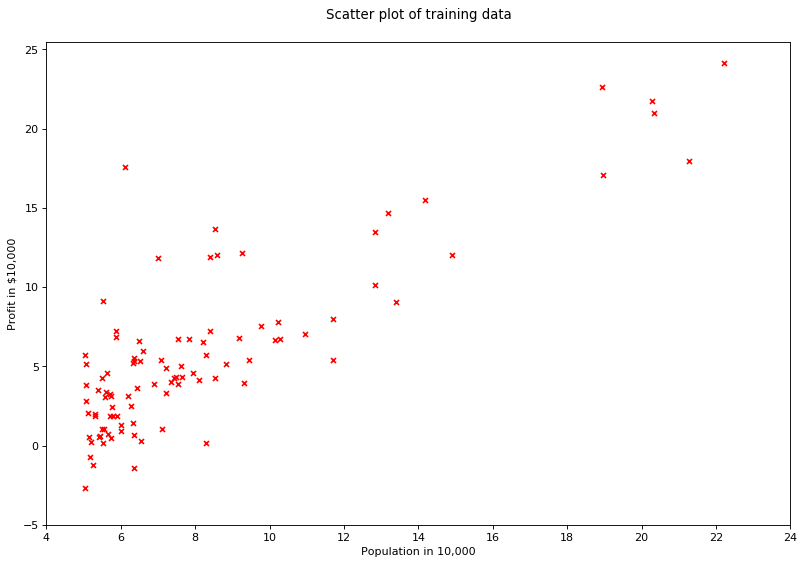

In [117]:
# visualising the data
fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
plt.scatter(df['population'], df['profit'], marker='x', color='red', s=20)
plt.xlim([4, 24])
plt.xticks(range(4, 26, 2))
plt.yticks(range(-5, 30, 5))
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in $10,000")
plt.title("Scatter plot of training data\n")
plt.show()

In [118]:
class LinearRegression(object):
    # Using Batch Gradient
    def __init__(self, X, y, alpha=0.01, n_iterations=5000):
        """
        Parameters
        ----------
        y : numpy array like, output / dependent variable
        X : numpy array like, input / independent variables
        alpha : float, int. Learning Rate
        n_iterations : Number of maximum iterations to perform gradient descent
        """
        self.y = y
        # add extra column at the beginning for theta_0
        self.X = self._hstack_one(X)
        # size of theta is based on number of independent variables
        self.thetas = np.zeros((self.X.shape[1], 1))
        self.n_rows = self.X.shape[0]
        self.alpha = alpha
        self.n_iterations = n_iterations
        print("Cost before fitting: {0:.2f}".format(self.cost()))

    @staticmethod
    def _hstack_one(input_matrix):
        """Horizontally stack a column of ones for the coefficients
        of the bias terms theta zero
        
        Parameters
        ----------
        input_matrix: numpy array like (N x M). Where N = number of 
            examples. M = Number of features.
        
        Returns
        -------
        numpy array with stacked column of ones (N x M + 1)
        """
        return np.hstack((np.ones((input_matrix.shape[0], 1)),
                              input_matrix))

    def cost(self, ):
        """Calculates the cost of current configuration"""
        return (1 / (2 * self.n_rows)) * np.sum(
            (self.X.dot(self.thetas) - self.y) ** 2)

    def predict(self, new_X):
        """Predict values using current configuration
        
        Parameters
        ----------
        new_X : numpy array like
        returns: prediction based on hypothesis h_theta
        """
        
        new_X = self._hstack_one(new_X)
        return new_X.dot(self.thetas)

    def batch_gradient(self, ):
        # result of taking derivatives of the theta_j
        h = self.X.dot(self.thetas) - self.y
        h = np.multiply(self.X, h)
        h = np.sum(h, axis=0)
        return h.reshape(-1, 1)

    def batch_gradient_descent(self, ):
        alpha_by_m = self.alpha / self.n_rows
        for i in range(self.n_iterations):
            self.thetas = self.thetas - (alpha_by_m * self.batch_gradient())
            cost = self.cost()
            print("Iteration: {0} Loss: {1:.5f}\r".format(i + 1, cost), end="")


In [119]:
X = df['population'].values.reshape(-1, 1)
y = df['profit'].values.reshape(-1, 1)
model = LinearRegression(X, y)
model.batch_gradient_descent()

Cost before fitting: 32.07


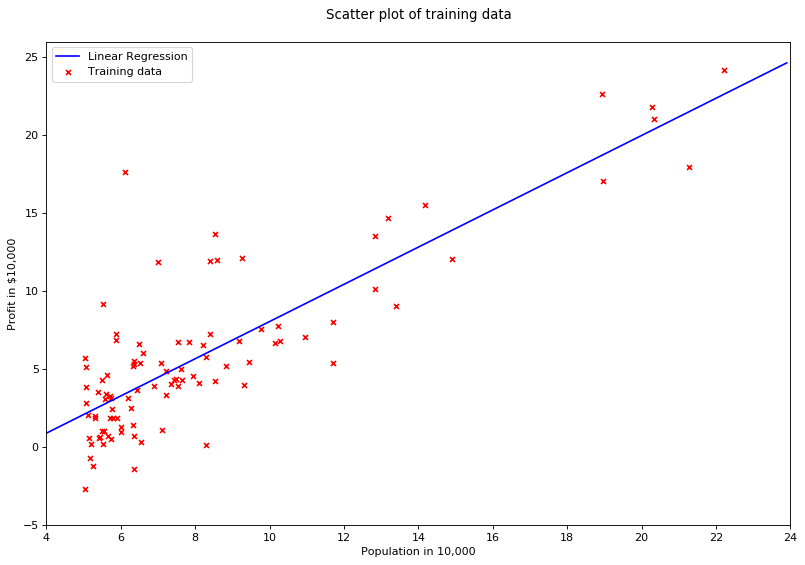

In [120]:
# plot regression line
X = np.arange(4, 24, 0.1).reshape(-1, 1)
fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
plt.scatter(df['population'], df['profit'], marker='x', color='red', s=20, label='Training data')
plt.plot(X, model.predict(X), color='blue', label='Linear Regression')
plt.xlim([4, 24])
plt.xticks(range(4, 26, 2))
plt.yticks(range(-5, 30, 5))
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in $10,000")
plt.title("Scatter plot of training data\n")
plt.legend()
plt.show()

In [121]:
def cost(theta_0, theta_1):
    """Calculate the cost with given weights
    
    Parameters
    ----------
    theta_0 : numpy array like, weights dim 0
    theta_1 : numpy array like, weights dim 1
    
    Returns
    -------
    float, cost
    """
    
    X = df['population'].values
    y = df['profit'].values
    X = X.reshape(-1, 1)
    y = y.reshape(-1, 1)
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    n_rows = X.shape[0]
    thetas = np.array([theta_0, theta_1]).reshape(-1, 1)
    return (1/(2*n_rows)) * sum((X.dot(thetas) - y)**2)[0]

def prepare_cost_matrix(theta0_matrix, theta1_matrix):
    """Prepares cost matrix for various weights to 
    create a 3D representation of cost. Every value
    in the cost matrix represents the cost for theta
    values in the theta matrices. 
    
    Parameters
    ----------
    theta0_matrix : numpy array like, weights dim 0
    theta1_matrix : numpy array like, weights dim 1
    """
    J_matrix = np.zeros(theta0_matrix.shape)
    row, col = theta0_matrix.shape 
    for x in range(row):
        for y in range(col):
            J_matrix[x][y] = cost(theta0_matrix[x][y], theta1_matrix[x][y])
    return J_matrix

theta_grid_0, theta_grid_1 = np.mgrid[-15:15:40j, -2:5:40j]
J_matrix = prepare_cost_matrix(theta_grid_0, theta_grid_1) 

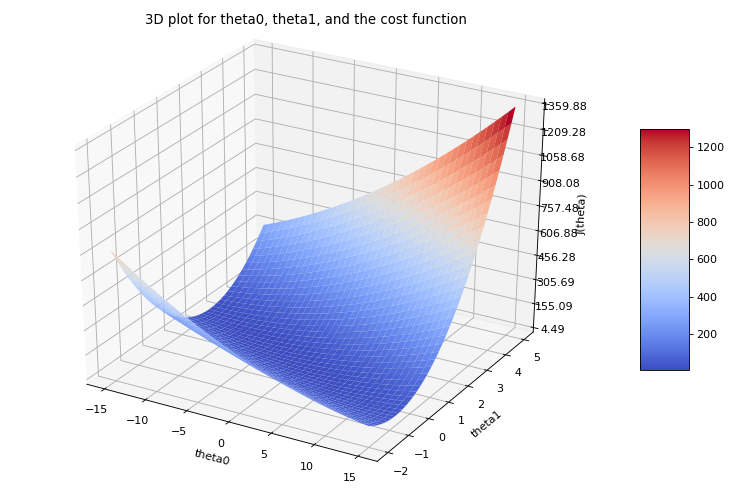

In [122]:
# Visualize J_matrix 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
ax = fig.gca(projection='3d')

surf = ax.plot_surface(theta_grid_0, theta_grid_1, J_matrix, cmap=cm.coolwarm,)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("J(theta)")
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("3D plot for theta0, theta1, and the cost function\n")
plt.show()

Text(0.5, 1.0, 'Cost function contour')

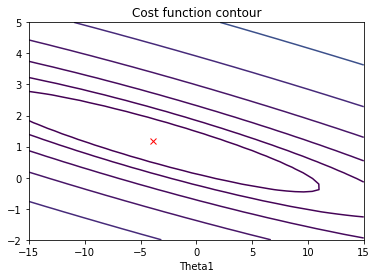

In [123]:
# Plot contour
plt.contour(theta_grid_0, theta_grid_1, J_matrix, 
            levels=[25, 50, 100, 200, 400, 800, 1600, 3200])

# Plot optmimum
theta = model.thetas
plt.plot(theta[0], theta[1], 'rx')

# Title and axis labels
plt.xlabel('Theta0')
plt.xlabel('Theta1')
plt.title('Cost function contour')

### Linear regression with multiple variables

In [124]:
# Load data from CSV file
# - column 1: house size in feet**2 (x1)
# - column 2: number of bedrooms (x2)
# - column 3: house price (y)
df = pd.read_csv("data/ml-ex1/ex1data2.csv", header=None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [125]:
X = df.iloc[:, [0, 1]].values
y = df.iloc[:, [2]].values

In [126]:
# sklearn.preprocessing.StandardScaler: Standardize features by removing 
# the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_Y.fit_transform(y)

In [127]:
model = LinearRegression(X, y, alpha=0.1, n_iterations=1000)
model.batch_gradient_descent()

Cost before fitting: 0.50


In [129]:
X_test = np.array([2104, 3]).reshape(1, 2)
print("Testing on : {0}".format(X_test[0]))
X_test = scaler_X.transform(X_test)
prediction = model.predict(X_test)
print("Prediction(Scaled): {0:.2f}".format(prediction[0][0]))
print("Prediction(Unscaled): {0:.2f}".format(scaler_Y.inverse_transform(prediction)[0][0]))

Testing on : [2104    3]
Prediction(Scaled): 0.13
Prediction(Unscaled): 356283.11


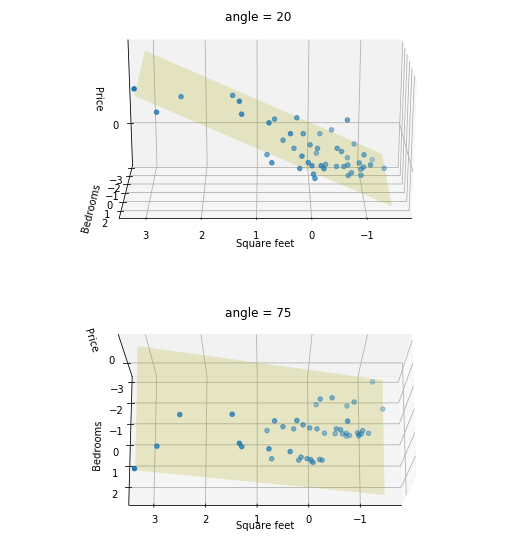

In [130]:
# Create a grid from feature min and max values
grid_range = np.vstack([X.min(axis=0), X.max(axis=0)])
grid = np.meshgrid(grid_range[:,0], grid_range[:,1])

# Compute predictions from grid values
X_grid = np.c_[grid[0].ravel(), grid[1].ravel()]
y_grid = model.predict(X_grid).reshape(grid[0].shape)

def plot_data_and_regression(fig, fignum, view_angle):
    sp = fig.add_subplot(2, 1, fignum, projection='3d')
    sp.view_init(view_angle, 90)
    sp.set_xlabel('Square feet')
    sp.set_ylabel('Bedrooms')
    sp.set_zlabel('Price')
    sp.set_title(f'angle = {view_angle}')
    # Customize tick locators
    sp.yaxis.set_major_locator(ticker.MultipleLocator(1.00))
    sp.zaxis.set_major_locator(ticker.MultipleLocator(200000))
    # Plot examples
    sp.scatter(X[:,0], X[:,1], y)
    # Plot regression area
    sp.plot_surface(grid[0], grid[1], y_grid, color='y', alpha=0.2)

# Create new figure
fig = plt.figure(2, figsize=[9, 10])
 
# Plot data and regression from two different angles
plot_data_and_regression(fig, fignum=1, view_angle=20)
plot_data_and_regression(fig, fignum=2, view_angle=75)